# Что измеряет MAPE

MAPE (Mean Absolute Percentage Error) измеряет среднюю относительную ошибку прогноза в процентах и интуитивно показывает,
насколько сильно предсказания отклоняются от фактических значений.

Метрика удобна для интерпретации, но имеет существенный недостаток:
она нестабильна при малых фактических значениях. Если истинное значение близко к нулю,
даже умеренная абсолютная ошибка приводит к огромному процентному отклонению, что искажает итоговую оценку модели.

По этой причине MAPE плохо подходит для задач, где целевая переменная может принимать значения,
близкие к нулю (например, спрос, продажи, трафик).

# Идея sMAPE

sMAPE (Symmetric Mean Absolute Percentage Error) — модификация MAPE,
в которой нормализация ошибки выполняется не только по фактическому значению,
а по сумме модулей факта и предсказания. За счёт этого снижается чувствительность к малым значениям и ошибка становится более симметричной.

## sMAPE целесообразно применять, если:

целевая переменная может быть равна нулю или близка к нулю;
важна относительная ошибка, а не абсолютная;
требуется устойчивая метрика для сравнения моделей в задачах прогнозирования спроса и временных рядов.

При этом стоит учитывать, что sMAPE по-прежнему остаётся относительной метрикой
и может быть менее интерпретируемой, чем абсолютные показатели (MAE, RMSE).

In [26]:
import numpy as np
import matplotlib.pyplot as plt


In [27]:
def smape(y_true: np.array, y_pred: np.array) -> float:
    """Вычисляет Symmetric Mean Absolute Percentage Error (sMAPE)."""
    
    denominator = np.abs(y_true) + np.abs(y_pred)
    
    # избегаем деления на ноль, заменяя 0 на 1
    denominator[denominator == 0] = 1
    
    return np.mean(2 * np.abs(y_true - y_pred) / denominator)

In [28]:
# пример для сравнения MAPE и sMAPE
y_true_values = np.linspace(0.1, 100, 100)
y_pred_values = np.full_like(y_true_values, 50)

mape_values = np.abs((y_true_values - y_pred_values) / y_true_values) * 100
smape_values = [
    smape(np.array([y_t]), np.array([y_p]))
    for y_t, y_p in zip(y_true_values, y_pred_values)
]

Ниже показано, как ведут себя MAPE и sMAPE при уменьшении истинного значения
при фиксированном прогнозе.

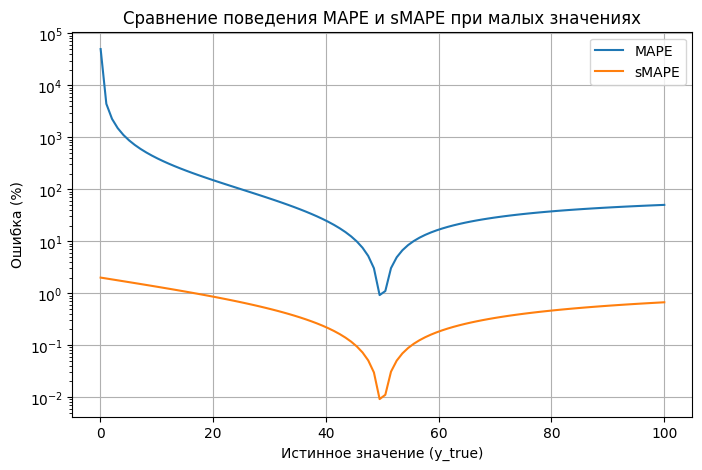

In [29]:

plt.figure(figsize=(8, 5))
plt.plot(y_true_values, mape_values, label="MAPE")
plt.plot(y_true_values, smape_values, label="sMAPE")
plt.yscale("log")
plt.xlabel("Истинное значение (y_true)")
plt.ylabel("Ошибка (%)")
plt.title("Сравнение поведения MAPE и sMAPE при малых значениях")
plt.legend()
plt.grid(True)
plt.show()


### Вывод: sMAPE — более устойчивая альтернатива MAPE для задач с малыми значениями целевой переменной, что наглядно подтверждается её поведением на графике.